In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import sys, os
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [51]:
# load data

bitcoin = pd.read_csv('crypto_data/bitcoin_price.csv')
bitcoin_cash = pd.read_csv('crypto_data/bitcoin_cash_price.csv')
bitconnect = pd.read_csv('crypto_data/bitconnect_price.csv')
dash = pd.read_csv('crypto_data/dash_price.csv')
ethereum = pd.read_csv('crypto_data/ethereum_price.csv')
ethereum_classic = pd.read_csv('crypto_data/ethereum_classic_price.csv')
iota = pd.read_csv('crypto_data/iota_price.csv')
litecoin = pd.read_csv('crypto_data/litecoin_price.csv')
monero = pd.read_csv('crypto_data/monero_price.csv')
nem = pd.read_csv('crypto_data/nem_price.csv')
neo = pd.read_csv('crypto_data/neo_price.csv')
numeraire = pd.read_csv('crypto_data/numeraire_price.csv')
omisego = pd.read_csv('crypto_data/omisego_price.csv')
qtum = pd.read_csv('crypto_data/qtum_price.csv')
ripple = pd.read_csv('crypto_data/ripple_price.csv')
stratis = pd.read_csv('crypto_data/stratis_price.csv')
waves = pd.read_csv('crypto_data/waves_price.csv')

__split = '2017-09-01'
__window = 10

In [52]:
# remove commas, set unavalable data to 0, convert to float
bitcoin['Volume'] = bitcoin['Volume'].apply(lambda n: n.split()[0].replace(',', ''))
bitcoin.loc[bitcoin['Volume'] == "-",'Volume'] = 0
bitcoin['Volume'] = bitcoin['Volume'].astype('int64')

In [53]:
# remove commas, convert to float
bitcoin['Market Cap'] = bitcoin['Market Cap'].apply(lambda n: n.split()[0].replace(',', ''))
bitcoin['Market Cap'] = bitcoin['Market Cap'].astype('int64')

In [54]:
# convert date
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])
# bitcoin.sort_values('Date', inplace=True)
# btc_temp = bitcoin
# btc_temp.set_index('Date', inplace=True)

In [55]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,9926540000,189536000000
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,7652090000,178055000000
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,8744010000,187663000000
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,8660880000,172191000000
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,7296160000,170960000000


In [56]:
# bitcoin.sort_values('Date', inplace=True)
bitcoin.set_index('Date', inplace=True)

In [57]:
bitcoin.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,11231.8,11958.5,11231.80,11403.7,9926540000,189536000000
2018-02-19,10552.6,11273.8,10513.20,11225.3,7652090000,178055000000
2018-02-18,11123.4,11349.8,10326.00,10551.8,8744010000,187663000000
2018-02-17,10207.5,11139.5,10149.40,11112.7,8660880000,172191000000
2018-02-16,10135.7,10324.1,9824.82,10233.9,7296160000,170960000000


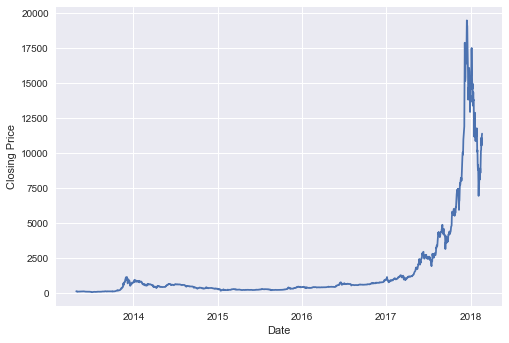

In [58]:
fig, ax = plt.subplots()
ax.set_ylabel('Closing Price')
ax.set_xlabel('Date')
ax.plot(bitcoin.index, bitcoin['Close'])
plt.show()

In [59]:
# normalize
bitcoin = bitcoin / bitcoin.iloc[0] - 1

In [60]:
bitcoin.head(20)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-19,-0.060471,-0.057256,-0.063979,-0.015644,-0.229128,-0.060574
2018-02-18,-0.009651,-0.050901,-0.080646,-0.074704,-0.119128,-0.009882
2018-02-17,-0.091196,-0.068487,-0.096369,-0.025518,-0.127503,-0.091513
2018-02-16,-0.097589,-0.136673,-0.125268,-0.102581,-0.264985,-0.098008
2018-02-15,-0.155227,-0.144140,-0.163484,-0.108500,-0.087039,-0.155701
2018-02-14,-0.234324,-0.204036,-0.234324,-0.167408,-0.203164,-0.234852
2018-02-13,-0.205228,-0.250870,-0.247190,-0.246007,-0.426112,-0.205871
2018-02-12,-0.275145,-0.248575,-0.275145,-0.217222,-0.369726,-0.275821


In [61]:
train, test = bitcoin[bitcoin.index < __split], bitcoin[bitcoin.index >= __split]

In [64]:
train_pt = []
test_pt = []

for elem in range(len(train) - __window):
    train_temp = train[elem : (elem + __window)].copy()
    train_temp = train_temp / train_temp.iloc[0] - 1
    train_pt.append(train_temp)
    
train_y_pts = (train['Close'][__window:].values / train['Close'][: - __window].values) - 1
train_pt = [np.array(elem) for elem in train_pt]
train_pt = np.array(train_pt)

for elem in range(len(test) - __window):
    test_temp = test[elem : (elem + __window)].copy()
    test_temp = test_temp / test_temp.iloc[0] - 1
    test_pt.append(test_temp)
    
test_y_pts = (test['Close'][__window:].values / test['Close'][: - __window].values) - 1
test_pt = [np.array(elem) for elem in test_pt]
test_pt = np.array(test_pt)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in true_divide


In [75]:
bitcoin_model = Sequential()
bitcoin_model.add(LSTM(20, input_shape=(train_pt.shape[1], train_pt.shape[2])))
bitcoin_model.add(Dropout(0.25))
bitcoin_model.add(Dense(units=1))
bitcoin_model.add(Activation("linear"))
bitcoin_model.compile(loss="mae", optimizer="adam")
train_res = (train['Close'][__window : ].values / train['Close'][ : - __window].values) - 1
bitcoin_hist = bitcoin_model.fit(train_pt, train_res, epochs = 30, batch_size = 1, verbose = 1, shuffle = True)

Epoch 1/30
1577/1577 [==============================] - 19s 12ms/step - loss: 0.0038
Epoch 2/30
1577/1577 [==============================] - 18s 11ms/step - loss: 0.0030
Epoch 3/30
1577/1577 [==============================] - 18s 12ms/step - loss: 0.0027
Epoch 4/30
1577/1577 [==============================] - 18s 12ms/step - loss: 0.0027
Epoch 5/30
1577/1577 [==============================] - 18s 11ms/step - loss: 0.0024
Epoch 6/30
1577/1577 [==============================] - 17s 11ms/step - loss: 0.0022
Epoch 7/30
1577/1577 [==============================] - 18s 12ms/step - loss: 0.0022
Epoch 8/30
1577/1577 [==============================] - 18s 12ms/step - loss: 0.0022
Epoch 9/30
1577/1577 [==============================] - 19s 12ms/step - loss: 0.0020
Epoch 10/30
1577/1577 [==============================] - 18s 11ms/step - loss: 0.0019
Epoch 11/30
1577/1577 [==============================] - 18s 11ms/step - loss: 0.0019
Epoch 12/30
1577/1577 [==============================] - 18s 12

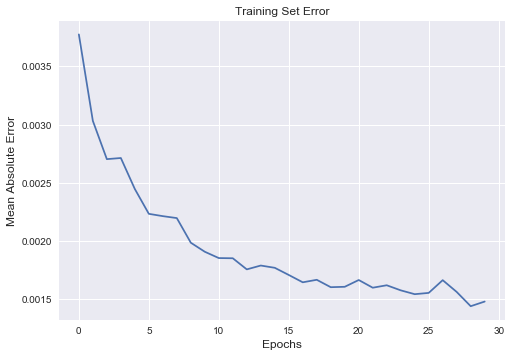

In [76]:
fig, ax = plt.subplots()
ax.plot(bitcoin_hist.epoch, bitcoin_hist.history['loss'])
ax.set_title('Training Set Error')
ax.set_ylabel('Mean Absolute Error',fontsize=12)
ax.set_xlabel('Epochs',fontsize=12)
plt.show()

In [95]:
train['Close'][__window:]

Date
2017-08-21   -0.649084
2017-08-20   -0.641550
2017-08-19   -0.632251
2017-08-18   -0.635152
2017-08-17   -0.620150
2017-08-16   -0.616210
2017-08-15   -0.633283
2017-08-14   -0.620726
2017-08-13   -0.642812
2017-08-12   -0.659347
2017-08-11   -0.679874
2017-08-10   -0.703493
2017-08-09   -0.706896
2017-08-08   -0.700103
2017-08-07   -0.703698
2017-08-06   -0.718167
2017-08-05   -0.714750
2017-08-04   -0.746057
2017-08-03   -0.754051
2017-08-02   -0.762299
2017-08-01   -0.761634
2017-07-31   -0.747859
2017-07-30   -0.758221
2017-07-29   -0.760915
2017-07-28   -0.753676
2017-07-27   -0.765709
2017-07-26   -0.778190
2017-07-25   -0.774066
2017-07-24   -0.758424
2017-07-23   -0.760569
                ...   
2013-05-27   -0.988622
2013-05-26   -0.988295
2013-05-25   -0.988427
2013-05-24   -0.988320
2013-05-23   -0.988890
2013-05-22   -0.989136
2013-05-21   -0.989225
2013-05-20   -0.989302
2013-05-19   -0.989303
2013-05-18   -0.989170
2013-05-17   -0.989212
2013-05-16   -0.989586
2013-0

In [99]:
# predictions 1 day
predictions = ((np.transpose(bitcoin_model.predict(train_pt)) + 1) * train['Close'].values[: - __window])

In [100]:
predictions

array([[-0.65189767, -0.64222421, -0.63134995, ..., -0.98787665,
        -0.98722663, -0.98766121]])

In [102]:
test['Close'][__window:]

Date
2018-02-10   -0.243938
2018-02-09   -0.233847
2018-02-08   -0.275183
2018-02-07   -0.331682
2018-02-06   -0.320045
2018-02-05   -0.390087
2018-02-04   -0.274182
2018-02-03   -0.195444
2018-02-02   -0.225624
2018-02-01   -0.195828
2018-01-31   -0.103703
2018-01-30   -0.113770
2018-01-29   -0.009409
2018-01-28    0.033551
2018-01-27    0.003245
2018-01-26   -0.020371
2018-01-25   -0.012654
2018-01-24   -0.003885
2018-01-23   -0.046941
2018-01-22   -0.041416
2018-01-21    0.017222
2018-01-20    0.131142
2018-01-19    0.017863
2018-01-18    0.006244
2018-01-17   -0.018862
2018-01-16    0.007612
2018-01-15    0.211870
2018-01-14    0.207678
2018-01-13    0.259258
2018-01-12    0.225971
                ...   
2017-09-30   -0.619535
2017-09-29   -0.634937
2017-09-28   -0.633914
2017-09-27   -0.631640
2017-09-26   -0.658677
2017-09-25   -0.655720
2017-09-24   -0.677049
2017-09-23   -0.667441
2017-09-22   -0.681621
2017-09-21   -0.681591
2017-09-20   -0.657484
2017-09-19   -0.655816
2017-0

In [103]:
# predictions 1 day
predictions_test = ((np.transpose(bitcoin_model.predict(test_pt)) + 1) * test['Close'].values[: - __window])

In [104]:
predictions_test

array([[        nan, -0.04462095, -0.19708978, -0.07276458, -0.27942884,
        -0.23970174, -0.29191794, -0.2226588 , -0.21569737, -0.23818059,
        -0.15838531, -0.12901426, -0.10554669, -0.07359143, -0.17213127,
        -0.06317544, -0.13092209, -0.089882  , -0.10941718, -0.14756327,
        -0.05477953, -0.22295621, -0.00985539,  0.02685026,  0.00327222,
        -0.01445767, -0.02306803, -0.00141739, -0.04049637, -0.08269177,
         0.02305162,  0.37360989,  0.04663581,  0.00605667, -0.02460625,
         0.01821867,  0.55913235,  0.564343  ,  0.45849198,  0.49513222,
         0.24788384,  0.25480431,  0.17958233,  0.20830631,  0.28122466,
         0.38218651,  0.49284413,  0.28248023,  0.24939164,  0.32072838,
         0.33823173,  0.38057486,  0.33575049,  0.57638641,  0.70334215,
         0.73909791,  0.88676022,  0.67873637,  0.61459372,  0.62283293,
         0.52307569,  0.45920552,  0.38088298,  0.34339348,  0.42075707,
         0.4077655 ,  0.36497762,  0.30903801,  0.2